#### 코랩에서 할 것
- tensorflow 2.x 버전용 

1.1. Import Library¶

In [82]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [83]:
# !pip install tensorflow==2.5
# !pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# # gpu 버전이 아닌 경우
# pip install --upgrade tensorflow==버전
# # gpu 버전인 경우
# pip install --upgrade tensorflow-gpu==버전

# # 업그레이드 예시
# pip install --upgrade tensorflow==2.7.0
# # 다운그레이드 예시
# pip install --upgrade tensorflow==1.15.0

1.2. Load Data

In [84]:
train_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_images.npy')
# /gdrive/MyDrive/Colab Notebooks/data_files/target_images.npy
train_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_labels.npy')
test_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_images.npy')
test_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_labels.npy')

print(train_imgs.shape)
print(train_labels[0]) # one-hot-encoded 5 classes 
print(test_imgs.shape)
print(test_labels[0]) # one-hot-encoded 5 classes 

# remove one-hot-encoding
train_labels = np.argmax(train_labels, axis = 1)
test_labels = np.argmax(test_labels, axis = 1)

(243, 224, 224, 3)
[1 0 0 0]
(81, 224, 224, 3)
[1 0 0 0]


In [85]:
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

# very small dataset
print(n_train)
print(n_test)

243
81


In [86]:
Dict = ["nike","addidas","channel","gucci"]
Dict[train_labels[2]]

'gucci'

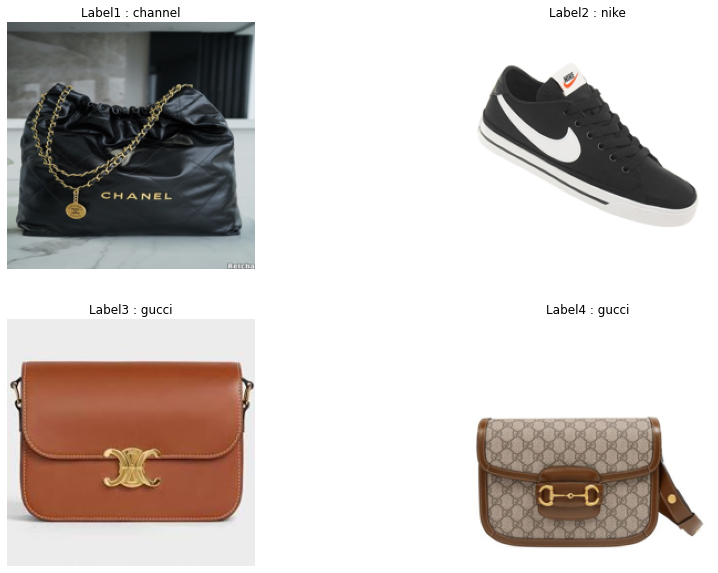

In [87]:
Dict =  ["channel","gucci","addidas","nike"]

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.imshow(train_imgs[1])
plt.title("Label1 : {}".format(Dict[train_labels[1]]))
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(train_imgs[2])
plt.title("Label2 : {}".format(Dict[train_labels[2]]))
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(train_imgs[3])
plt.title("Label3 : {}".format(Dict[train_labels[3]]))
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(train_imgs[20])
plt.title("Label4 : {}".format(Dict[train_labels[20]]))
plt.axis('off')
plt.show()


1.3. Load VGG16 Model

In [88]:
model_type = tf.keras.applications.vgg16
base_model = model_type.VGG16()
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1.4. Testing for Target Data

1/1 [==============================] - 1s 802ms/step
sandal (39.36%)
hand_blower (11.08%)
gasmask (10.12%)
holster (8.24%)
oxygen_mask (4.83%)


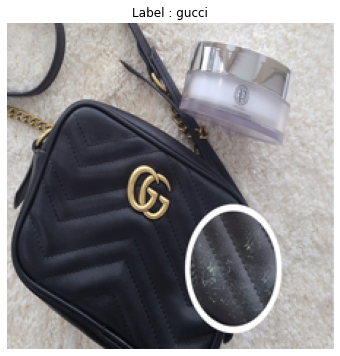

In [89]:
idx = np.random.randint(n_test)
pred = base_model.predict(test_imgs[idx].reshape(-1, 224, 224, 3))
label = model_type.decode_predictions(pred)[0]

print('%s (%.2f%%)' % (label[0][1], label[0][2]*100))
print('%s (%.2f%%)' % (label[1][1], label[1][2]*100))
print('%s (%.2f%%)' % (label[2][1], label[2][2]*100))
print('%s (%.2f%%)' % (label[3][1], label[3][2]*100))
print('%s (%.2f%%)' % (label[4][1], label[4][2]*100))
    
plt.figure(figsize = (6,6))
plt.imshow(test_imgs[idx])
plt.title("Label : {}".format(Dict[test_labels[idx]]))
plt.axis('off')
plt.show()    

2. Learn From Scratchm

In [90]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (224, 224, 3)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    
    tf.keras.layers.Dense(units = 4, activation = 'softmax')
])

In [91]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [92]:
model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

Epoch 1/10
25/25 [==============================] - 23s 899ms/step - loss: 33.7543 - accuracy: 0.2675
Epoch 2/10
25/25 [==============================] - 22s 892ms/step - loss: 1.2897 - accuracy: 0.3827
Epoch 3/10
25/25 [==============================] - 22s 889ms/step - loss: 1.0503 - accuracy: 0.5226
Epoch 4/10
25/25 [==============================] - 23s 900ms/step - loss: 0.7049 - accuracy: 0.7037
Epoch 5/10
25/25 [==============================] - 22s 897ms/step - loss: 0.5857 - accuracy: 0.7572
Epoch 6/10
25/25 [==============================] - 25s 1s/step - loss: 0.4872 - accuracy: 0.7984
Epoch 7/10
25/25 [==============================] - 22s 896ms/step - loss: 0.4438 - accuracy: 0.8066
Epoch 8/10
25/25 [==============================] - 22s 893ms/step - loss: 0.3189 - accuracy: 0.8848
Epoch 9/10
25/25 [==============================] - 22s 896ms/step - loss: 0.3961 - accuracy: 0.8395
Epoch 10/10
25/25 [==============================] - 23s 901ms/step - loss: 0.5684 - accuracy

In [93]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

3/3 [==============================] - 3s 621ms/step - loss: 1.7570 - accuracy: 0.4938


In [94]:
# 3. Transfer Learning
# 3.1. Pre-trained Weights, Biases

In [95]:
vgg16_weights = base_model.get_weights()

In [96]:
# 3.2. Build a Transfer Learning Model

In [97]:
# replace new and trainable classifier layer
fc2_layer = base_model.layers[-2].output
output = tf.keras.layers.Dense(units = 5, activation = 'softmax')(fc2_layer)

# define new model
model = tf.keras.Model(inputs = base_model.inputs, outputs = output)

In [ ]:
model.summary()

In [ ]:
# 3.3. Define Loss and Optimizer

In [98]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = 'accuracy')

In [99]:
# 3.4. Optimize

In [100]:
model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

Epoch 1/10
25/25 [==============================] - 129s 5s/step - loss: 1.2000 - accuracy: 0.5761
Epoch 2/10
25/25 [==============================] - 126s 5s/step - loss: 0.4184 - accuracy: 0.8519
Epoch 3/10
25/25 [==============================] - 128s 5s/step - loss: 0.2898 - accuracy: 0.8765
Epoch 4/10
25/25 [==============================] - 125s 5s/step - loss: 0.1684 - accuracy: 0.9383
Epoch 5/10
25/25 [==============================] - 142s 6s/step - loss: 0.1228 - accuracy: 0.9506
Epoch 6/10
25/25 [==============================] - 129s 5s/step - loss: 0.0383 - accuracy: 0.9877
Epoch 7/10
25/25 [==============================] - 126s 5s/step - loss: 0.0240 - accuracy: 0.9959
Epoch 8/10
25/25 [==============================] - 126s 5s/step - loss: 0.0258 - accuracy: 0.9959
Epoch 9/10
25/25 [==============================] - 127s 5s/step - loss: 0.0223 - accuracy: 0.9959
Epoch 10/10
25/25 [==============================] - 126s 5s/step - loss: 0.0269 - accuracy: 0.9918


In [ ]:
# 3.5. Test and Evaluate

In [103]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

3/3 [==============================] - 42s 13s/step - loss: 0.6145 - accuracy: 0.8519


1/1 [==============================] - 1s 594ms/step


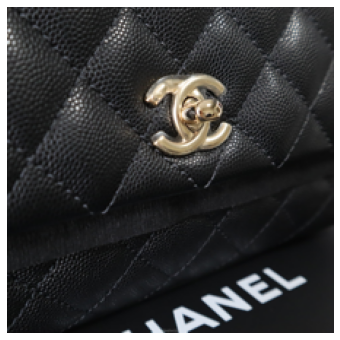

Prediction : nike


In [122]:
# test_x = random.choice(test_imgs).reshape(-1,224,224,3)
test_x = test_imgs[np.random.choice(n_test, 1)]
pred = np.argmax(model.predict(test_x))

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(224, 224, 3))
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))